# ベイズ推論による機械学習 第3章

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

import numpy as np
from scipy import stats

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


## ベルヌーイ分布の学習

In [2]:
class Bern:
    '''ベータ分布を事前分布とするベルヌーイ分布の学習
    '''
    def __init__(self, a, b):
        '''事前分布のベータの初期値を設定する
        inputs : a, float, a > 0
                      b, float, b > 0
        '''
        self.a = a
        self.b = b
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, 1-d array, {0 or 1}
        return : None
        '''
        sum_X = np.sum(X)
        self.a = sum_X + self.a
        self.b = len(X) - sum_X + self.b
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        x = np.linspace(0, 1, num=100)
        params = stats.beta.pdf(x, self.a, self.b)
        plt.plot(x, params)
        plt.ylim(0, 10)
        plt.grid()
        plt.title(title)
        plt.show()
        return
        
    def predict(self, N):
        '''事後分布(事前分布)を使って予測を行う
        inputs : N, int, N > 0
        return : array, {0, 1}
        '''
        return np.random.binomial(n=1, p=self.a/(self.a + self.b), size=N)

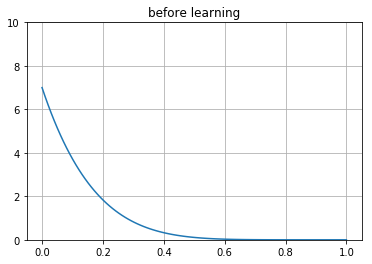

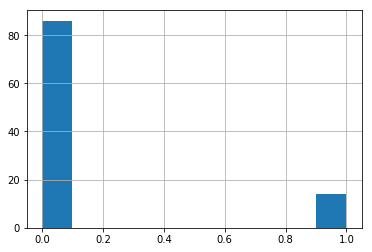

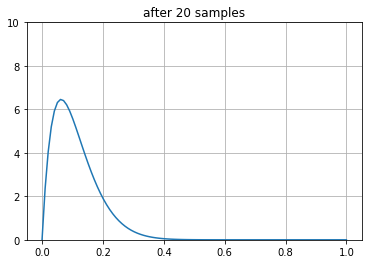

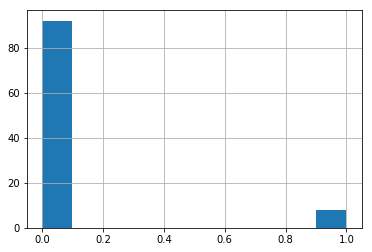

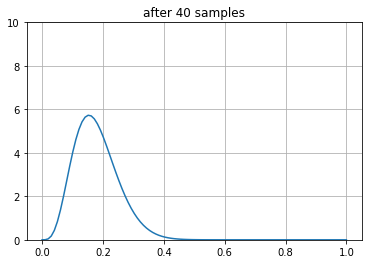

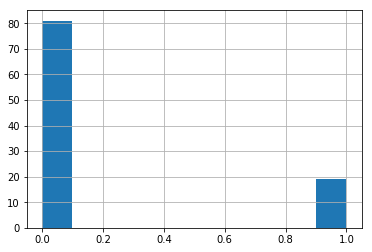

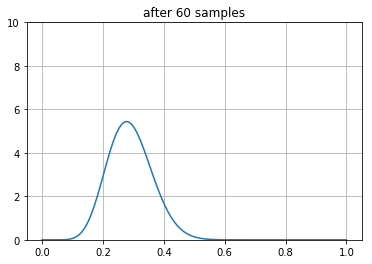

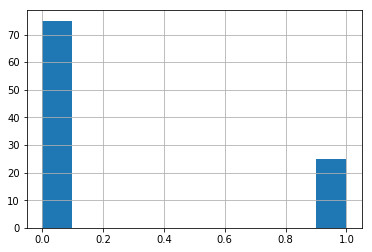

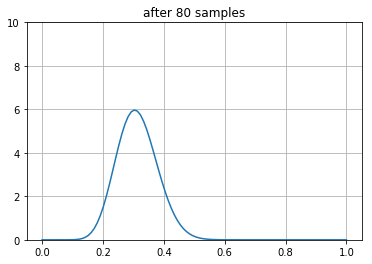

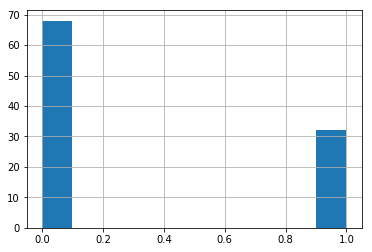

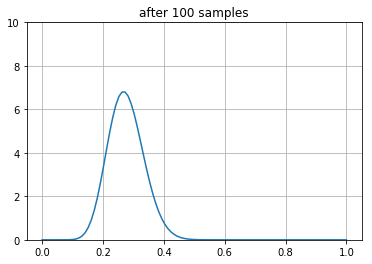

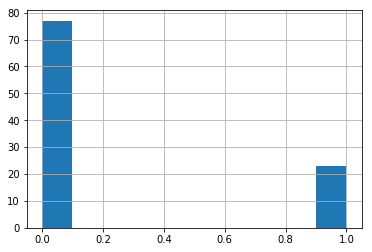

In [3]:
# 初期設定
bern = Bern(1,7)

# 学習前
bern.show_params("before learning")
# 予測分布
plt.hist(bern.predict(100))
plt.grid()
plt.show()
    
for i in range(5):
    # 真の分布からサンプリング
    true_p = 0.3
    N = 20
    X = np.random.binomial(n=1, p=true_p, size=10)

    # 事後分布の更新
    bern.fit(X)

    # 学習後
    bern.show_params(f"after {N*(i+1)} samples")
    
    # 予測分布
    plt.hist(bern.predict(100))
    plt.grid()
    plt.show()

## カテゴリ分布の学習

In [4]:
def draw_dirichlet(alpha=[1,1,1], title=""):
    N = 75
    x = np.linspace(0,1,N) 
    y = np.linspace(0,1,N) 
    X, Y = np.meshgrid(x,y) 
    tmp_index = np.where(X+Y>=1)
    X[tmp_index] = np.nan; Y[tmp_index] = np.nan
    Z = 1 - X - Y
    pos = np.empty(X.shape + (3,)) 
    pos[:, :, 0] = X; pos[:, :, 1] = Y; pos[:, :, 2] = Z

    # メッシュ毎の確率密度を求める
    probs = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            probs[i][j] = stats.dirichlet.pdf(x=pos[i][j], alpha=alpha)

    #Make a 3D plot 
    fig = plt.figure() 
    ax = Axes3D(fig)
    ax.plot_wireframe(X, Y, probs)
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('prob') 
    ax.set_zlim(0,25)
    plt.title(title)
    plt.show() 
    return

In [5]:
class Cat:
    '''ディレクレ分布を事前分布とするカテゴリカル分布の学習
    '''
    def __init__(self, alpha):
        '''事前分布のディレクレ分布の事前パラメータを設定する
        inputs : alpha, 1-d array, {alpha_i > 0}
        '''
        self.alpha = alpha
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, array(N * K), {X[i, :] = one hot }
        return : None
        '''
        self.alpha += np.sum(X, axis=0)
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        draw_dirichlet(self.alpha, title=title)
        return
        
    def predict(self, N):
        '''事後分布(事前分布)を使って予測を行う
        inputs : N, int, N > 0
        return : array, {0, 1}
        '''
        return np.random.multinomial(1, self.alpha / np.sum(self.alpha), N)

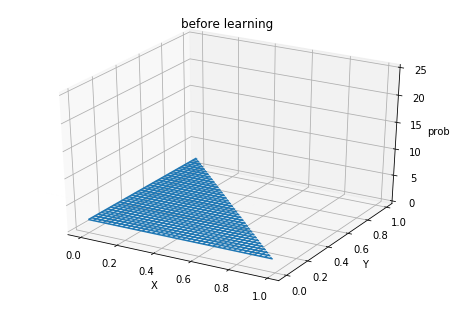

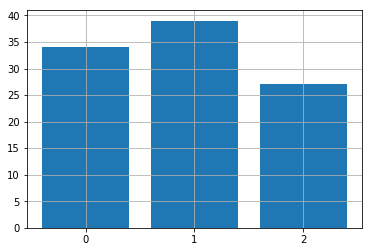

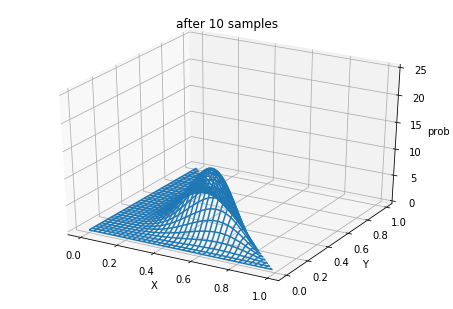

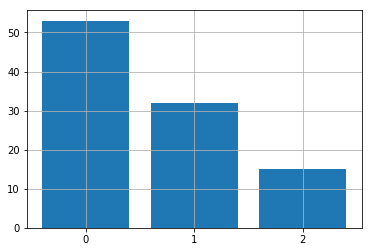

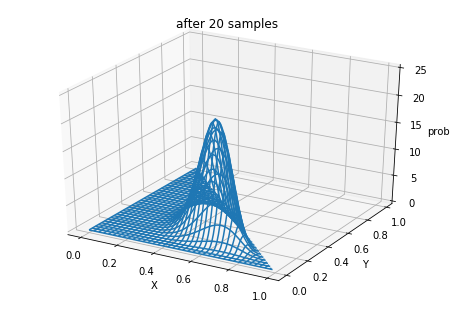

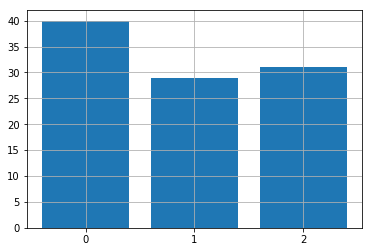

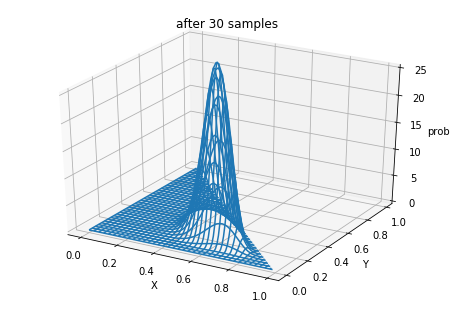

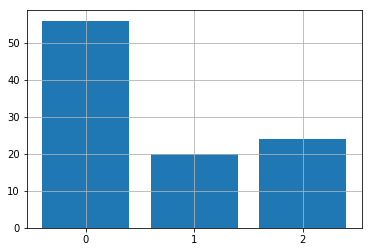

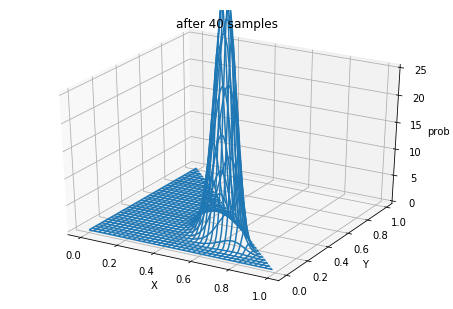

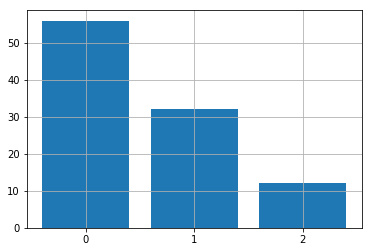

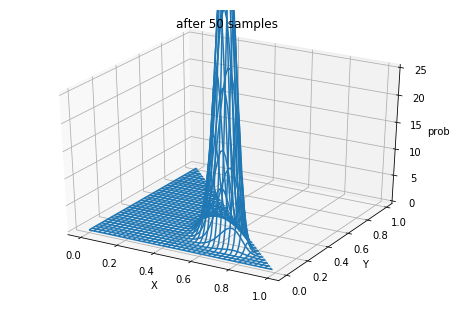

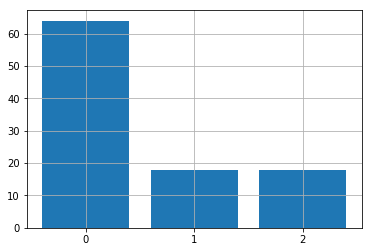

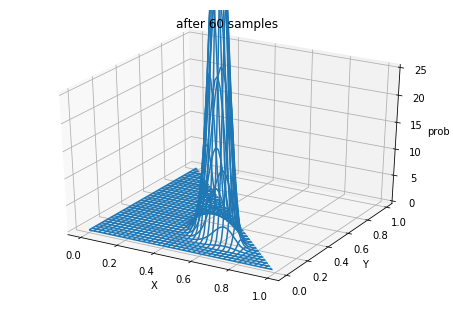

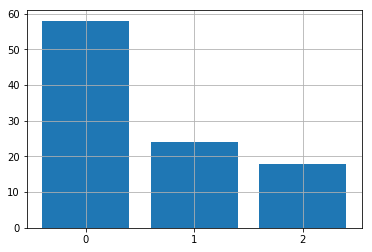

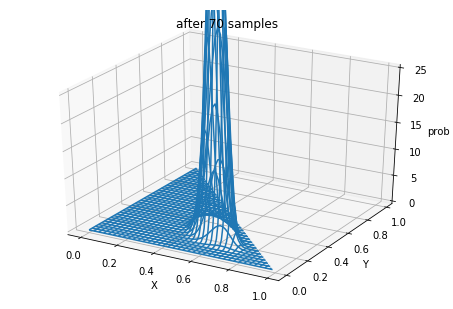

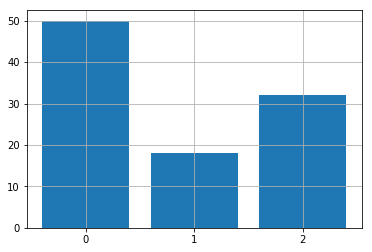

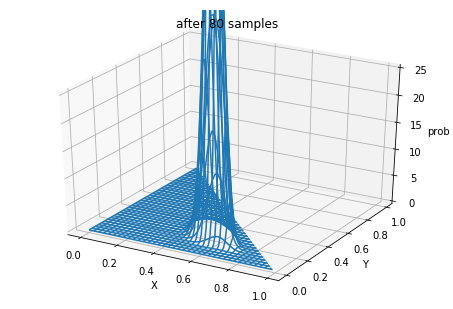

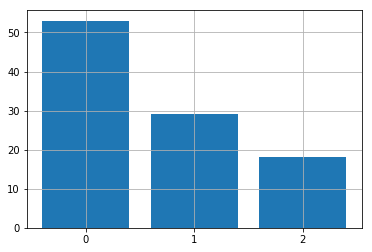

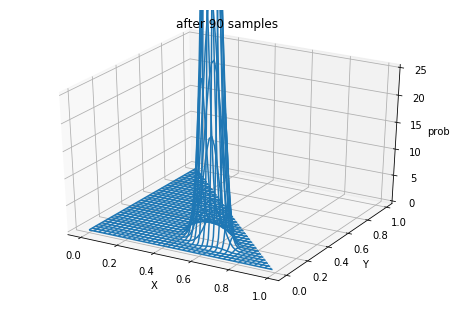

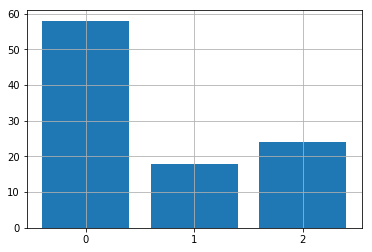

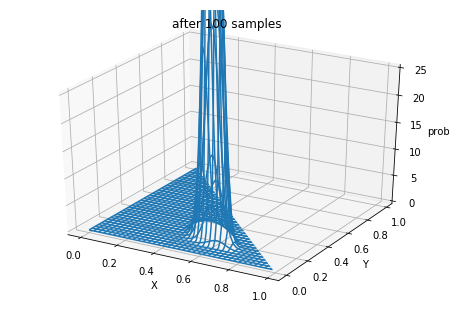

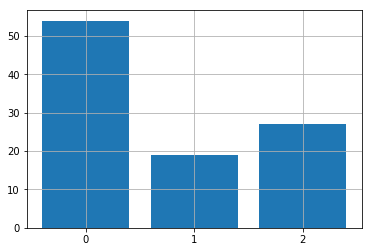

In [6]:
# 初期設定
cat = Cat([1, 1, 1])

# 学習前
cat.show_params("before learning")
# 予測分布
heights = np.sum(cat.predict(100), axis=0)
plt.bar(np.arange(len(heights)), heights)
plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
plt.grid()
plt.show()
    
for i in range(10):
    # 真の分布からサンプリング
    true_alpha = [5, 2, 2]
    N = 10
    X = np.random.multinomial(1, true_alpha / np.sum(true_alpha), N)

    # 事後分布の更新
    cat.fit(X)

    # 学習後
    cat.show_params(f"after {N*(i+1)} samples")
    
    # 予測分布
    heights = np.sum(cat.predict(100), axis=0)
    plt.bar(np.arange(len(heights)), heights)
    plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
    plt.grid()
    plt.show()

before learning


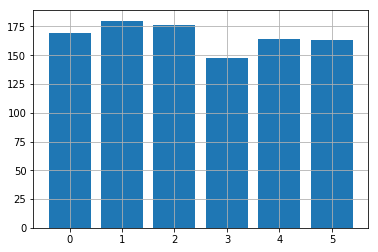

after 10 samples


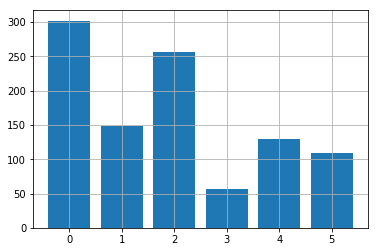

after 20 samples


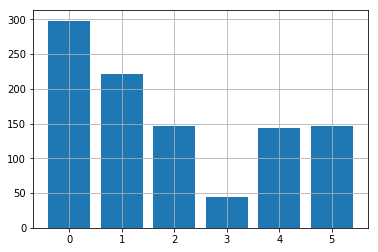

after 30 samples


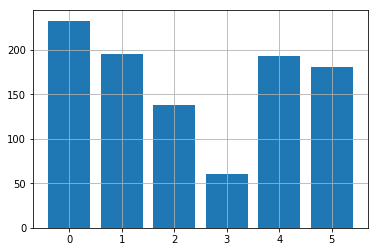

after 40 samples


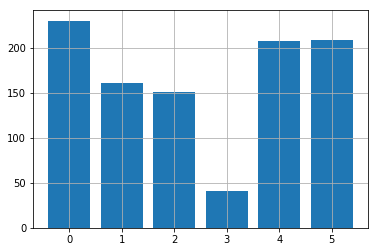

after 50 samples


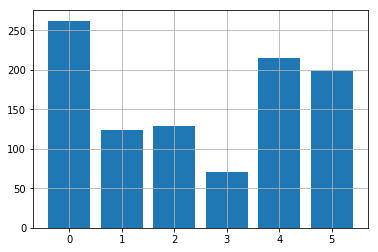

after 60 samples


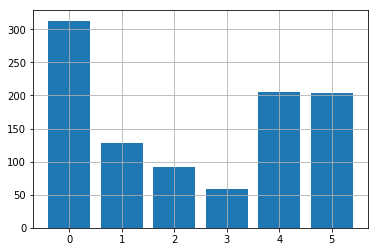

after 70 samples


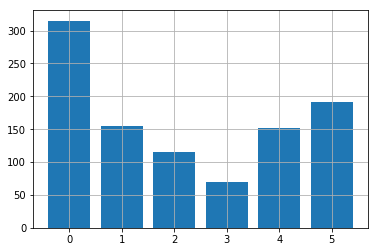

after 80 samples


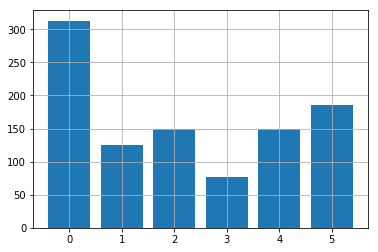

after 90 samples


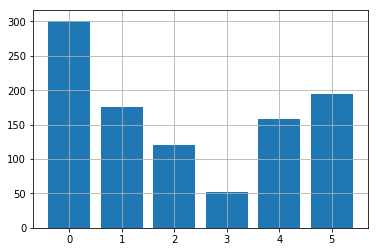

after 100 samples


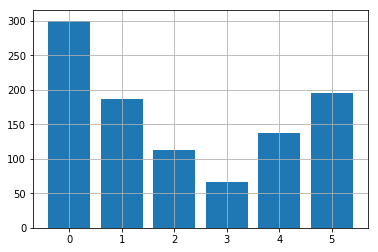

In [193]:
# 初期設定
cat = Cat([1, 1, 1, 1, 1, 1])

# # 学習前
print("before learning")
# 予測分布
heights = np.sum(cat.predict(1000), axis=0)
plt.bar(np.arange(len(heights)), heights)
plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
plt.grid()
plt.show()
    
for i in range(10):
    print(f"after {N*(i+1)} samples")
    # 真の分布からサンプリング
    true_alpha = [5, 2, 2, 1, 4, 4]
    N = 10
    X = np.random.multinomial(1, true_alpha / np.sum(true_alpha), N)

    # 事後分布の更新
    cat.fit(X)
    
    # 予測分布
    heights = np.sum(cat.predict(1000), axis=0)
    plt.bar(np.arange(len(heights)), heights)
    plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
    plt.grid()
    plt.show()

## ポアソン分布の学習

In [197]:
class Poi:
    '''ガンマ分布を事前分布とするポアソン分布の学習
    '''
    def __init__(self, a, b):
        '''事前分布のガンマ分布の事前パラメータを設定する
        inputs : a, float, a > 0
                      b, float, b > 0
        '''
        self.a = a
        self.b = b
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, 1-d array, {X_i > 0}
        return : None
        '''
        self.a += np.sum(X) + a
        self.b += len(X) + b
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        x = np.linspace(0, 10, 100)
        plt.plot(x, stats.gamma.pdf(x,self.a,scale=1./self.b))
        plt.grid()
        plt.show()
        return
        
    def predict(self, N):
        '''事後分布(事前分布)を使って予測を行う
        inputs : N, int, N > 0
        return : array, {0, 1}
        '''
        return np.random.multinomial(1, self.alpha / np.sum(self.alpha), N)

In [198]:
poi = Poi(10, 2)

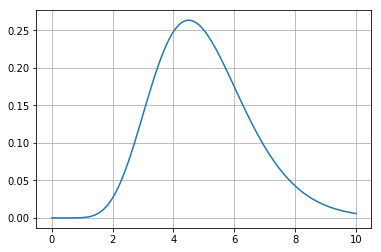

In [199]:
poi.show_param()

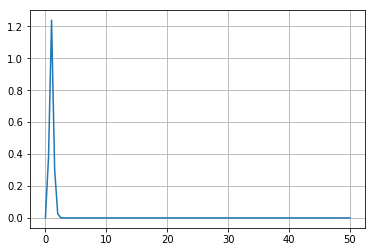

In [196]:
x = np.linspace(0, 50, 100)
plt.plot(x, stats.gamma.pdf(x,10,scale=1./10))
plt.grid()
plt.show()